<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-03-tree-based-models-gradient-boosted-xboost-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 3.3 Extreme Gradient Boosting (XGBoost)

XGBoost (Extreme Gradient Boosting) is a scalable and efficient machine learning algorithm for supervised learning tasks, particularly effective for regression, classification, and ranking problems. It is an optimized implementation of gradient boosting, a method that builds an ensemble of weak prediction models (typically decision trees) in a sequential manner to produce a strong predictive model. XGBoost is widely used due to its high performance, flexibility, and ability to handle large datasets with missing values, regularization, and parallel processing. This notebook will provide an overview of XGBoost, explain how it works, and demonstrate how to implement it in Python for regression and classification tasks.



## Overview

XGBoost constructs a model by combining multiple decision trees, where each tree corrects the errors of the previous ones. It uses gradient boosting, which minimizes a loss function by iteratively adding trees, with each tree trained to predict the residuals (errors) of the prior ensemble. XGBoost enhances this process with additional features like regularization, second-order gradient optimization, and efficient handling of sparse data.


### Key Features of XGBoost

- **Gradient Boosting Framework**: Combines weak learners (typically decision trees) into a strong predictive model.
- **Optimization**: Uses advanced techniques like second-order gradient optimization (Newton boosting) for faster convergence.
- **Regularization**: Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Parallelization**: Supports parallel and distributed computing for faster training.
- **Handling Missing Data**: Automatically handles missing values by learning the best imputation strategy.
- **Feature Importance**: Provides insights into feature importance for model interpretability.
- **Flexibility**: Supports custom loss functions and evaluation metrics.

### How XGBoost Works

XGBoost is based on the gradient boosting framework, which iteratively combines weak learners (typically decision trees) to form a strong predictive model. It optimizes a loss function while adding regularization to prevent overfitting. Below is a detailed explanation of how XGBoost works, including the key equations.

1.  Objective Function

The `objective function` is a mathematical expression that a model aims to minimize during training. It quantifies the model’s performance by combining a loss function, which measures prediction error, with a regularization term, which controls model complexity to prevent overfitting. In XGBoost, the objective function guides the construction of decision trees in the gradient boosting process.

The core of XGBoost is to minimize an objective function that combines a loss function and a regularization term. For a dataset with $n$samples and $m$ features, the objective function at iteration $t$ is:

$$ \text{Obj}^{(t)} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^t \Omega(f_k) $$

-   $l(y_i, \hat{y}_i^{(t)})$: Loss function measuring the difference between the true label $y_i$ and the predicted value $\hat{y}_i^{(t)}$.

Common loss functions include:

-   Mean Squared Error (MSE) for regression:

$$ l(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2 $$

-   Log-loss for binary classification:

$$ l(y_i, \hat{y}_i) = -[y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)] $$

-   $\Omega(f_k)$: Regularization term for the $k$-th tree to penalize model complexity and prevent overfitting:

$$ \Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2 $$

-   $T$: Number of leaves in the tree.

-   $w_j$: Weight (score) of the $j$-th leaf.

-   $\gamma$: Penalty for the number of leaves (controls tree size).

-   $\lambda$: L2 regularization parameter on leaf weights.

2.  Additive Training

XGBoost builds the model additively. At iteration $t$, the prediction for sample $i$ is:

$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta f_t(x_i) $$

-   $f_t(x_i)$: Output of the $t$-th tree for input $x_i$.

-   $\eta$: Learning rate (shrinkage factor) to scale the contribution of each tree.

The goal is to find the tree $f_t$ that minimizes the objective function.

3.  Second-Order Approximation

To optimize the objective function, XGBoost uses a second-order Taylor approximation of the loss function. For a given sample ( i ), the loss function is approximated as:

$$ l(y_i, \hat{y}_i^{(t)}) \approx l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 $$

-   $g_i = \partial_{\hat{y}_i^{(t-1)}} l(y_i, \hat{y}_i^{(t-1)})$: First-order gradient (gradient of the loss w.r.t. the prediction).

-   $h_i = \partial_{\hat{y}_i^{(t-1)}}^2 l(y_i, \hat{y}_i^{(t-1)})$: Second-order gradient (Hessian of the loss).

The objective function becomes:

$$ \text{Obj}^{(t)} \approx \sum_{i=1}^n \left[ g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 \right] + \Omega(f_t) $$

4.  Tree Structure Optimization

Each tree partitions the data into leaves, and each leaf has a weight $w_j$. For a given tree structure, the optimal leaf weight for leaf $j$ is:

$$ w_j^* = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda} $$

-   $I_j$: Set of samples in leaf $j$.

-   The corresponding objective value for the leaf is:

$$ \text{Obj}_j = -\frac{1}{2} \frac{(\sum_{i \in I_j} g_i)^2}{\sum_{i \in I_j} h_i + \lambda} + \gamma $$

The algorithm greedily searches for the best split by maximizing the gain:

$$ \text{Gain} = \frac{1}{2} \left[ \frac{(\sum_{i \in I_L} g_i)^2}{\sum_{i \in I_L} h_i + \lambda} + \frac{(\sum_{i \in I_R} g_i)^2}{\sum_{i \in I_R} h_i + \lambda} - \frac{(\sum_{i \in I} g_i)^2}{\sum_{i \in I} h_i + \lambda} \right] - \gamma $$

-   $I_L$, $I_R$: Left and right child nodes after a split.

-   $I$: Parent node before the split.

Here below is a flowchart illustrating the XGBoost workflow:


![alt text](http://drive.google.com/uc?export=view&id=1Dc3bkYebbiQG5D-q-LOG0BbDeATZliXn
)








### Advantages of XGBoost

1. `High Performance`: Consistently outperforms other algorithms in machine learning competitions (e.g., Kaggle) due to its accuracy and efficiency.
2. `Scalability`: Handles large datasets efficiently through parallel processing and optimized memory usage.
3. `Robustness to Overfitting`: Built-in regularization (L1 and L2) and tree pruning reduce overfitting compared to traditional gradient boosting.
4. `Handles Diverse Data`: Works well with structured/tabular data, missing values, and categorical features (with preprocessing).
5. `Flexibility`: Supports a wide range of tasks (classification, regression, ranking) and custom optimization objectives.
6. `Feature Importance`: Provides clear insights into which features drive predictions, aiding interpretability.
7. `Community and Ecosystem`: Widely used, with strong community support, extensive documentation, and integration with tools like scikit-learn and Spark.

### Limitations of XGBoost

1. `Complexity`: Requires careful hyperparameter tuning (e.g., learning rate, max depth, number of trees) to achieve optimal performance, which can be time-consuming.
2. `Computational Cost`: Despite optimizations, training can be resource-intensive for very large datasets or deep trees compared to simpler models like linear regression.
3. `Not Ideal for Unstructured Data`: Less effective for unstructured data (e.g., images, text) compared to deep learning models like neural networks.
4. `Interpretability`: While feature importance is provided, the ensemble nature of many trees can make it harder to interpret compared to single decision trees or linear models.
5. `Sensitivity to Noisy Data`: Can overfit on noisy datasets if not properly tuned or regularized.
6. `Cold Start Problem`: Struggles with new or unseen data patterns unless retrained, unlike online learning algorithms.
7. `Over-reliance on Tuning`: Performance heavily depends on hyperparameter optimization, which requires expertise or extensive grid search.


### Key Tunable Hyperparameters in XGBoost

1. General Parameters

- `booste`: Type of learner (`gbtree`, `gblinear`, `dart`). Default: `gbtree`.

2. Booster Parameters

- `eta (learning_rate)`: Step size shrinkage (0.01–0.3). Default: 0.3.
- `max_depth`: Max tree depth (3–10). Default: 6.
- `min_child_weight`: Min sum of instance weights in a child (1–10). Default: 1.
- `subsample`: Fraction of data sampled per tree (0.5–1). Default: 1.
- `colsample_bytree`: Fraction of features per tree (0.5–1). Default: 1.
- `colsample_bylevel`: Fraction of features per level (0.5–1). Default: 1.
- `colsample_bynode`: Fraction of features per node (0.5–1). Default: 1.
- `gamma*` Min loss reduction for a split (0–5). Default: 0.
- `lambda (reg_lambda)`: L2 regularization on weights (0–10). Default: 1.
- `alpha (reg_alpha)`: L1 regularization on weights (0–1). Default: 0.

3. Training Parameters

- `n_estimators (num_boost_round)`: Number of trees (100–1000). Default: 100.
- `early_stopping_rounds`: Stops if no improvement (10–50). Default: None.

4. Task-Specific Parameters

- `objective`: Loss function (e.g., `reg:squarederror`, `binary:logistic`). Depends on task.
- *`eval_metric`: Evaluation metric (e.g., `rmse`, `logloss`, `auc`). Matches objective.

5. Tuning Tips

- Start with defaults, adjust `eta`, `max_depth`, `subsample`, `colsample_bytree` first.
- Use lower `eta` with more `n_estimators` for robustness.
- Increase `gamma`, `lambda`, `alpha` to reduce overfitting.
- Apply early stopping with a validation set.
- Use grid search, random search, or Bayesian optimization (e.g., Optuna).

### Differences Between XGBoost, GBM, LightGBM, and Random Forest

XGBoost, GBM (Gradient Boosting Machine), LightGBM, and Random Forest are all tree-based machine learning algorithms, but they differ in their approach, optimization techniques, and performance characteristics. Below is a detailed comparison of these algorithms, followed by a table summarizing their differences.

Here’s a table summarizing the key differences across **GBM**, **XGBoost**, **LightGBM**, and **Random Forest**:

| **Aspect**                  | **GBM**                                                                 | **XGBoost**                                                             | **LightGBM**                                                            | **Random Forest**                                                       |
|-----------------------------|-------------------------------------------------------------------------|-------------------------------------------------------------------------|-------------------------------------------------------------------------|-------------------------------------------------------------------------|
| `Algorithm Type`          | Gradient boosting (sequential tree building)                            | Optimized gradient boosting                                             | Gradient boosting with histogram-based optimization                     | Bagging-based ensemble of independent trees                            |
| `Tree Construction`       | Sequential, additive (each tree corrects previous errors)               | Sequential, additive with regularization                                | Sequential, leaf-wise growth (splits best leaf)                        | Parallel, independent trees with bagging                               |
| `Optimization`            | Gradient descent (first-order)                                          | Second-order gradient (Newton boosting) for faster convergence          | Gradient-based one-side sampling (GOSS) and histogram binning           | No gradient optimization; uses random feature subsets and bagging       |
| `Speed`                   | Slower due to lack of parallelization and optimizations                 | Faster than GBM due to parallelization and caching                      | Faster than XGBoost for large datasets due to histogram-based approach  | Fast due to parallel tree construction, but no sequential optimization  |
| `Memory Efficiency`       | Moderate to high memory usage                                           | Improved memory efficiency over GBM                                     | Highly memory-efficient due to histogram binning                        | Moderate to high, depending on number of trees                         |
| `Regularization`          | Limited or none (depends on implementation)                            | L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting         | L1 and L2 regularization, similar to XGBoost                            | No explicit regularization; relies on randomness and averaging          |
| `Handling Missing Values` | Not natively supported (requires preprocessing)                        | Natively handles missing values by learning optimal split directions    | Natively handles missing values                                         | Not natively supported (requires imputation)                           |
| `Scalability`             | Poor for large datasets due to sequential processing                    | Good scalability with parallel and distributed computing                | Excellent for large datasets due to histogram-based approach            | Good scalability due to parallel tree building                         |
| `Categorical Features`    | Requires preprocessing (e.g., one-hot encoding)                         | Requires preprocessing, but handles sparse data well                    | Native support for categorical features (no encoding needed)            | Requires preprocessing (e.g., one-hot encoding)                         |
| `Feature Importance`      | Supported, but less refined                                            | Detailed feature importance (gain, cover, frequency)                    | Detailed feature importance, similar to XGBoost                         | Feature importance based on Gini impurity or permutation importance     |
| `Overfitting Control`     | Prone to overfitting without careful tuning                             | Strong control via regularization and early stopping                    | Strong control via regularization and efficient leaf-wise growth        | Less prone to overfitting due to bagging and random feature selection   |
| `Interpretability`        | Moderate (complex due to sequential trees)                              | Moderate, but feature importance aids interpretability                  | Moderate, similar to XGBoost                                            | Relatively interpretable due to independent trees                      |
|`Use Case Suitability`    | General-purpose, smaller datasets                                       | High-performance tasks (e.g., Kaggle competitions, tabular data)        | Large-scale datasets, high-dimensional data                            | General-purpose, robust for noisy data, tabular data                   |
| `Implementation*`        | Available in scikit-learn, R, etc.                                      | Dedicated library (`xgboost`), integrates with scikit-learn, Spark      | Dedicated library (`lightgbm`), integrates with scikit-learn, Spark     | Available in scikit-learn, R, and other libraries                      |
| `GPU Support`            | Limited or none (depends on implementation)                            | Supported for faster training                                           | Strong GPU support for large-scale training                            | Limited or no GPU support in most implementations                      |
| `Hyperparameter Tuning`   | Moderate tuning complexity                                             | Extensive tuning (learning rate, max depth, etc.)                      | Moderate tuning, but fewer parameters than XGBoost                      | Simpler tuning (e.g., number of trees, max features)                   |
| `Limitations`             | Slow, lacks advanced optimizations, no native missing value handling    | Requires tuning, less effective for unstructured data                   | May overfit with leaf-wise growth if not tuned properly                | Less accurate than boosting for complex patterns, no sequential learning|



### Key Distinctions

1. Boosting vs. Bagging

   - GBM, XGBoost, and LightGBM use **boosting**, where trees are built sequentially to correct errors, making them more powerful for capturing complex patterns but prone to overfitting if not tuned.
   - Random Forest uses **bagging**, building independent trees in parallel, which is faster and more robust to noise but may not capture intricate patterns as effectively.

2. Optimization and Speed

   - GBM is the slowest due to its basic implementation and lack of parallelization.
   - XGBoost improves on GBM with parallel processing and second-order optimization.
   - LightGBM is optimized for speed and memory efficiency, especially for large datasets, using histogram-based techniques and leaf-wise growth.
   - Random Forest is fast due to parallel tree construction but lacks the iterative optimization of boosting methods.

3. Scalability and Data Handling

   - LightGBM excels with large, high-dimensional datasets due to its histogram-based approach and native categorical feature support.
   - XGBoost is scalable but slightly less efficient than LightGBM for very large datasets.
   - GBM struggles with large datasets due to its sequential nature.
   - Random Forest scales well but requires preprocessing for missing values and categorical features.

4. Overfitting and Robustness

   - XGBoost and LightGBM include regularization to control overfitting, but their sequential nature makes them sensitive to noise if not tuned.
   - Random Forest is inherently robust to overfitting due to bagging and randomness but may underperform on complex tasks.
   - GBM is prone to overfitting without careful tuning or regularization.

5. Use Cases

   - `GBM`: Suitable for smaller datasets or when simplicity is preferred, but less common in modern applications.
   - `XGBoost`: Widely used in competitions and tabular data tasks requiring high accuracy (e.g., finance, healthcare).
   - `LightGBM`: Preferred for large-scale datasets, such as in big data environments or real-time applications.
   - `Random Forest`: Ideal for quick prototyping, noisy data, or when interpretability and robustness are prioritized.



## Extreme Gradient Boosting from Scratch

Fitting an `XGBoost` model manually without using R packages like {xgboost} is a complex task because XGBoost relies on optimized implementations for gradient boosting, tree construction, and parallel processing. However, it’s possible to implement a simplified version of the XGBoost algorithm from scratch in R by following its core principles: gradient boosting with decision trees, second-order gradient optimization, and regularization. This requires manually coding the tree construction, gradient and Hessian calculations, and the objective function optimization, which is computationally intensive and less efficient than the optimized {xgboost} package. Below, I’ll explain how to implement a basic version of XGBoost for regression, focusing on the mathematical framework and providing R code without external packages. The explanation will include equations and a step-by-step process to make it clear.

### Data Generation

- Generates synthetic data: 100 samples with 2 features (X).
- Regression target: `y_reg = 3*X1 + 2*X2 + noise`.
- Classification target: `y_class = 1 if X1 + X2 > 1, else 0`.






In [ ]:
import numpy as np

# Data Generation
np.random.seed(123)
n = 100
X = np.random.rand(n, 2)  # 2 features
y_reg = 3 * X[:, 0] + 2 * X[:, 1] + np.random.normal(0, 0.1, n)  # Regression target
y_class = (X[:, 0] + X[:, 1] > 1).astype(int)  # Classification target (0 or 1)


### Initialization and Parameters

- Sets hyperparameters: `n_trees=10`, `eta=0.1`, `max_depth=3`, `min_child_weight=1`, `lambda=1`, `gamma=0.`
- Initializes predictions to 0 (regression) or 0.5 (classification).


In [ ]:
# Initialization and Parameters
n_trees = 10
eta = 0.1
max_depth = 3
min_child_weight = 1
lambda_reg = 1  # Renamed from lambda to avoid keyword conflict
gamma = 0

# Loss functions
def mse_loss(y, pred):
  return (y - pred)**2

def logloss(y, pred):
  pred = np.clip(pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
  return -y * np.log(pred) - (1 - y) * np.log(1 - pred)

### Gradient and Hessian Calculation

To compute the `gradients` and `Hessian`s for regression and classification tasks, we define a function that calculates these values based on the predictions and true labels. The gradients represent the first derivative of the loss function, while the Hessians represent the second derivative.

In [ ]:
# Gradient and Hessian Calculation
def compute_grad_hess(y, pred, task="regression"):
  if task == "regression":
    return {'grad': 2 * (pred - y), 'hess': np.full_like(y, 2)}
  else:
    pred = np.clip(pred, 1e-15, 1 - 1e-15)  # Stabilize for classification
    return {'grad': (pred - y) / (pred * (1 - pred)), 'hess': 1 / (pred * (1 - pred))}

### Finding the Best Split

To find the best split for a given feature, we iterate through unique values of that feature and calculate the gain from splitting the data at each value. The gain is computed using the gradients and Hessians for the left and right splits, following the XGBoost formula. Applies `min_child_weight`, `lambda`, and `gamma` to control splits.




In [ ]:
# Finding the Best Split
def find_best_split(X, grad, hess, feature_idx, min_child_weight, lambda_reg, gamma):
  n = X.shape[0]
  values = np.sort(np.unique(X[:, feature_idx]))
  best_gain = -np.inf
  best_split = None
  total_G = np.sum(grad)
  total_H = np.sum(hess)

  for val in values[:-1]:
    left_idx = np.where(X[:, feature_idx] <= val)[0]
    right_idx = np.where(X[:, feature_idx] > val)[0]

    if len(left_idx) == 0 or len(right_idx) == 0:
      continue

    G_left = np.sum(grad[left_idx])
    H_left = np.sum(hess[left_idx])
    G_right = total_G - G_left
    H_right = total_H - H_left

    if H_left < min_child_weight or H_right < min_child_weight:
      continue

    gain = 0.5 * ((G_left**2 / (H_left + lambda_reg)) + (G_right**2 / (H_right + lambda_reg)) -
                   (total_G**2 / (total_H + lambda_reg))) - gamma

    if gain > best_gain:
      best_gain = gain
      best_split = {'feature': feature_idx, 'value': val, 'gain': gain}
  return best_split

### Building the Decision Tree

To build the decision tree, we recursively split the data based on the best splits found in the previous step. The tree construction continues until reaching the maximum depth or when no further splits improve the gain. Each leaf node is assigned a weight based on the gradients and Hessians of the samples in that leaf. Computes optimal leaf weights: `-sum(grad)/(sum(hess) + lambda)`.

In [ ]:
# Building the Decision Tree
def build_tree(X, grad, hess, depth, max_depth, min_child_weight, lambda_reg, gamma):
  if depth >= max_depth or X.shape[0] < 2:
    w = -np.sum(grad) / (np.sum(hess) + lambda_reg)
    return {'leaf': True, 'weight': w}

  best_split = None
  best_gain = -np.inf
  for feature_idx in range(X.shape[1]):
    split = find_best_split(X, grad, hess, feature_idx, min_child_weight, lambda_reg, gamma)
    if split is not None and split['gain'] > best_gain:
      best_gain = split['gain']
      best_split = split

  if best_split is None or best_gain <= 0:
    w = -np.sum(grad) / (np.sum(hess) + lambda_reg)
    return {'leaf': True, 'weight': w}

  left_idx = np.where(X[:, best_split['feature']] <= best_split['value'])[0]
  right_idx = np.where(X[:, best_split['feature']] > best_split['value'])[0]

  left_subtree = build_tree(X[left_idx, :], grad[left_idx], hess[left_idx],
                            depth + 1, max_depth, min_child_weight, lambda_reg, gamma)
  right_subtree = build_tree(X[right_idx, :], grad[right_idx], hess[right_idx],
                             depth + 1, max_depth, min_child_weight, lambda_reg, gamma)

  return {'leaf': False, 'feature': best_split['feature'], 'value': best_split['value'],
          'left': left_subtree, 'right': right_subtree}

### Predicting with the Tree

To make predictions with the decision tree, we traverse the tree based on the feature values of the input data. If we reach a leaf node, we return the weight assigned to that leaf. This function recursively checks the feature value against the split value to navigate through the tree. Applies sigmoid transformation for classification predictions.

In [ ]:
# Predicting with the Tree
def predict_tree(tree, x):
  if tree['leaf']:
    return tree['weight']
  if x[tree['feature']] <= tree['value']:
    return predict_tree(tree['left'], x)
  else:
    return predict_tree(tree['right'], x)

### Main Boosting Loop

The main boosting loop iterates through the number of trees to be built. In each iteration, it computes the gradients and Hessians for the current predictions, builds a decision tree based on these values, and updates the predictions by adding the tree's output scaled by the learning rate (`eta`). The predictions are updated for both regression (direct addition) and classification (applying a sigmoid function).

In [ ]:
# Main Boosting Loop
def xgboost_train(X, y, n_trees, eta, max_depth, min_child_weight, lambda_reg, gamma, task="regression"):
  n = X.shape[0]
  pred = np.full(n, 0) if task == "regression" else np.full(n, 0.5)
  trees = []

  for t in range(n_trees):
    gh = compute_grad_hess(y, pred, task)
    tree = build_tree(X, gh['grad'], gh['hess'], 0, max_depth, min_child_weight, lambda_reg, gamma)
    trees.append(tree)

    for i in range(n):
      pred[i] += eta * predict_tree(tree, X[i, :])
      if task == "classification":
        pred[i] = 1 / (1 + np.exp(-pred[i]))  # Sigmoid

  return {'trees': trees, 'pred': pred, 'task': task}

### Final Prediction and Evaluation

- Predicts using the ensemble of trees.
- Evaluates regression with `MSE` and classification with `log-loss` and `accuracy`.


In [ ]:
# Final Prediction and Evaluation
def predict_xgboost(model, X):
  n = X.shape[0]
  pred = np.full(n, 0) if model['task'] == "regression" else np.full(n, 0.5)

  for tree in model['trees']:
    for i in range(n):
      pred[i] += eta * predict_tree(tree, X[i, :])
      if model['task'] == "classification":
        pred[i] = 1 / (1 + np.exp(-pred[i]))
  return pred

# Evaluation Metrics
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

def logloss_eval(y_true, y_pred):
  y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
  return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def accuracy(y_true, y_pred):
  return np.mean(y_true == (y_pred > 0.5))

### Train and Evaluate Regression Model


In [ ]:
# Train and evaluate regression model
model_reg = xgboost_train(X, y_reg, n_trees, eta, max_depth, min_child_weight, lambda_reg, gamma, task="regression")
pred_reg = predict_xgboost(model_reg, X)
mse_reg = mse(y_reg, pred_reg)
print(f"Regression MSE: {mse_reg}\n")

Regression MSE: 7.07126477855163



### Train and Evaluate Classification Model

In [ ]:
# Train and evaluate classification model
model_class = xgboost_train(X, y_class, n_trees, eta, max_depth, min_child_weight, lambda_reg, gamma, task="classification")
pred_class = predict_xgboost(model_class, X)
logloss_class = logloss_eval(y_class, pred_class)
acc_class = accuracy(y_class, pred_class)
print(f"Classification Log-loss: {logloss_class}\n")
print(f"Classification Accuracy: {acc_class}\n")

Classification Log-loss: 0.7190060213707795

Classification Accuracy: 0.5



## Extreme Gradient Boosting with Python

{XGBoost} is a powerful gradient boosting library in Python, optimized for speed and performance. Below is a concise guide to using XGBoost for a typical machine learning task, including installation, basic usage, and a simple example.

XGBoost (eXtreme Gradient Boosting) is a highly optimized, scalable, and fast machine learning library in Python designed for gradient boosting. It excels in supervised learning tasks like classification, regression, and ranking, offering state-of-the-art performance on structured/tabular data. Known for its efficiency, flexibility, and robustness, XGBoost is widely used in data science competitions and real-world applications due to its ability to handle large datasets, missing values, and complex patterns with minimal preprocessing.

Key features of XGBoost:

- **Gradient Boosting**: Implements advanced gradient boosting algorithms with tree-based models, optimized for speed and accuracy.
- **Scalability**: Supports parallel processing, distributed computing, and GPU acceleration for faster training on large datasets.
- **Regularization**: Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Flexibility**: Handles various objective functions (e.g., binary classification, regression, ranking) and custom loss functions.
- **Feature Importance**: Provides tools to assess and visualize feature importance for model interpretability.
- **Cross-Validation and Early Stopping**: Built-in support for cross-validation and early stopping to optimize model performance.
- **Handling Missing Values**: Automatically handles missing data without requiring imputation.
- **Scikit-Learn Compatibility**: Offers a scikit-learn API (`XGBClassifier`, `XGBRegressor`) for seamless integration with Python’s ML ecosystem.
- **Multi-Language Support**: Available in Python, R, Java, and more, with a focus on Python for its rich ecosystem.

Key functions of {XGboost} package are:

- **`xgboost.train(params, dtrain, num_boost_round, evals)`**: Trains a model using the native API with a `DMatrix` dataset, customizable parameters, and optional evaluation sets for monitoring performance.
- **`xgboost.cv(params, dtrain, num_boost_round, nfold)`**: Performs k-fold cross-validation to evaluate model performance and tune hyperparameters.
- **`xgboost.DMatrix(data, label)`**: Converts input data (e.g., numpy arrays, pandas DataFrames) into XGBoost’s optimized `DMatrix` format for efficient training.
- **`model.predict(data)`**: Generates predictions for new data using a trained model (available in both native and scikit-learn APIs).
- **`model.fit(X, y)`**: Trains a model using the scikit-learn API, compatible with pandas/numpy inputs.
- **`xgboost.plot_importance(model)`**: Visualizes feature importance scores to interpret model behavior.
- **`model.save_model(filename)` / `model.load_model(filename)`**: Saves or loads a trained model for reusability.

For more details, visit the [XGBoost Documentation](https://xgboost.readthedocs.io/) or check the [GitHub repository](https://github.com/dmlc/xgboost).

.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, log_loss
import xgboost as xgb
import matplotlib.pyplot as plt

### Regression with XGBoost

This section of tutorial will focus on using the XGBoost package to perform regression analysis. We will load the dataset, preprocess it, and then fit an XGBoost model for regression. The dataset will be split into training and testing sets, and we will evaluate the model's performance using RMSE (Root Mean Squared Error).

#### Data and Data Preparation



In [5]:
# Load Boston Housing dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df_boston = pd.read_csv(url)

# Prepare the data for regression
features = df_boston.drop('median_house_value', axis=1)
target = df_boston['median_house_value']

# Handle categorical features by one-hot encoding
features = pd.get_dummies(features, columns=['ocean_proximity'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Convert the data into xgb.DMatrix objects for native API
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#### Fit Initial Model with Fixed Parameters

Next, we'll fit the XGBoost model by using the `xgb.train()` function, which displays the training and testing RMSE (root mean squared error) for each round of boosting. We use a few tunning prameters with default values.

In [11]:
# Define parameters for the initial XGBoost regression model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.3,
    'gamma': 0,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'subsample': 0.8
}

# Train the initial XGBoost model
initial_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    verbose_eval=False # Set to True to see progress
)



#### Cross-validation

In [16]:
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10,
    seed=42
)
print("Cross-validation RMSE (mean):", cv_results['test-rmse-mean'].iloc[-1])

Cross-validation RMSE (mean): 49148.39826059182


#### Predict and Evaluate Initial Model

In [15]:

from sklearn.metrics import mean_squared_error

y_pred_initial = initial_model.predict(dtest)
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))  # Compute RMSE
r2_initial = r2_score(y_test, y_pred_initial)
print(f"Initial Model - RMSE: {rmse_initial:.2f}, R2: {r2_initial:.2f}")

Initial Model - RMSE: 48209.76, R2: 0.82


#### Variable Importance (Initial Model)

Variable importance in XGBoost indicates how much each feature contributes to the model's predictions. It helps identify which predictors are most influential in determining the target variable. The importance can be measured using metrics like gain, cover, and frequency. Gain measures the contribution of a feature to the model's accuracy, cover indicates the relative quantity of observations concerned by a feature, and frequency counts how often a feature is used in trees.

<Figure size 1000x600 with 0 Axes>

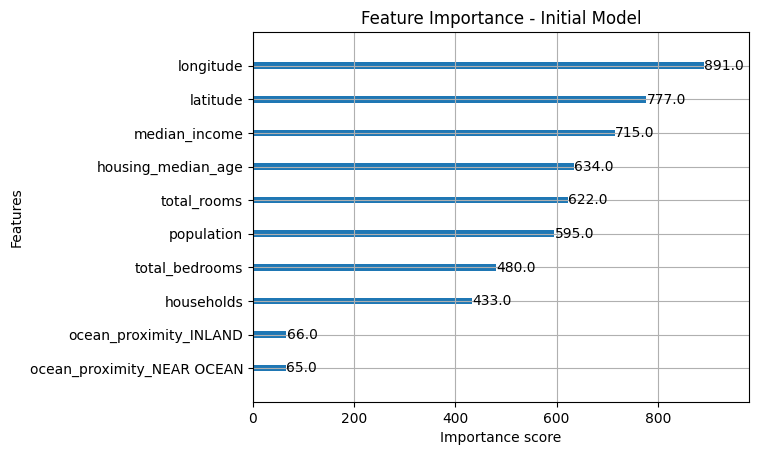

In [17]:
plt.figure(figsize=(8, 6))
xgb.plot_importance(initial_model, max_num_features=10)
plt.title("Feature Importance - Initial Model")
plt.show()

#### Hyperparameter Tuning for the Best Parameters

To optimize the XGBoost model, we can perform cross-validation to find the best hyperparameters. This involves testing different combinations of parameters like `max_depth`, `eta`, and `nrounds` to minimize the RMSE on the validation set.


##### Define Parameter Grid and Initialize Variables

In [18]:
# Hyperparameter Tuning - Random Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'eta': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constrai...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eta': [0.05, 0.1, 0.2, 0.3],
                                        'gamma': [0, 0.1, 0.5],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

##### The best parameters

In [20]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 9, 'gamma': 0.1, 'eta': 0.05, 'colsample_bytree': 0.6}


##### Train and Validate Model with Best Parameters

In [22]:
# Train the final XGBoost model with best parameters
best_params.update({'objective': 'reg:squarederror', 'eval_metric': 'rmse'})
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    verbose_eval=False)

##### Predictions and Evaluation

In [24]:
# Make predictions on the training and testing sets using the trained final model
y_pred_final = final_model.predict(dtest)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"\nFinal Model RMSE: {rmse_final:.2f}")




Final Model RMSE: 47601.52


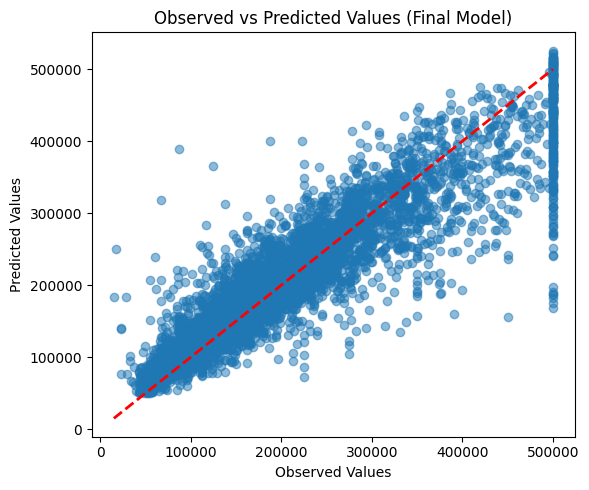

In [25]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values (Final Model)')
plt.show()


##### Variable Importance



<Figure size 600x550 with 0 Axes>

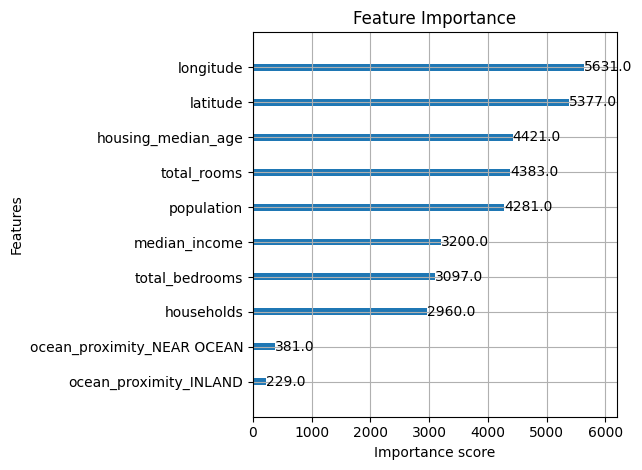

In [26]:
# Variable Importance
plt.figure(figsize=(6, 5.5))
xgb.plot_importance(final_model, max_num_features=10)
plt.title('Feature Importance')
plt.show()


#### Early Stopping

Early stopping in XGBoost is a technique used to prevent overfitting by monitoring the model's performance on a validation set during training. If the model's performance does not improve for a specified number of rounds (defined by `early_stopping_rounds`), training is halted. This helps to find the optimal number of boosting rounds without excessive computation and ensures that the model generalizes well to unseen data.

In XGBoost, this is implemented by monitoring a performance metric (e.g., RMSE for regression) on a validation dataset during training. If the metric does not improve for a defined number of consecutive rounds (early_stopping_rounds), training stops, and the model returns the iteration with the best performance. This helps select an optimal number of boosting rounds (nrounds) without overfitting to the training data.

In [27]:
# Fit Model with Early Stopping
early_stopping_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)


In [29]:
# Prediction and Evaluation (Final Model with Early Stopping)
y_pred_final = early_stopping_model.predict(dtest)
r2_final = r2_score(y_test, y_pred_final)
print(f"Final Model (Early Stopping) - RMSE: {rmse_final:.2f}, R2: {r2_final:.2f}")

Final Model (Early Stopping) - RMSE: 47601.52, R2: 0.84


### Classification with XGBoost

In this section, we will use the XGBoost package to perform classification on a dataset. We will load the dataset, preprocess it, and then fit an XGBoost model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and confusion matrix.

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [30]:
# Load the health insurance dataset for classification
data_classification = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")

# Convert gender to numeric (Male: 0, Female: 1)
data_classification['gender'] = data_classification['gender'].astype('category').cat.codes

# Convert product to numeric labels (A: 0, B: 1, C: 2)
data_classification['product'] = data_classification['product'].astype('category').cat.codes

# Select features and target for classification
features_classification = ['age', 'household', 'position_level', 'absent', 'gender']
X_classification = data_classification[features_classification]
y_classification = data_classification['product']

# Split data into training (80%) and test (20%) sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=123)

# Convert data to DMatrix format for XGBoost classification
dtrain_classification = xgb.DMatrix(data=X_train_classification, label=y_train_classification)
dtest_classification = xgb.DMatrix(data=X_test_classification, label=y_test_classification)

#### Fit lightGBM Classification Model

In [31]:
# Define parameters for the initial XGBoost classification model
params_classification = {
    'objective': 'multi:softmax',  # For multi-class classification with raw predictions
    'num_class': 3,                # Number of classes (A, B, C)
    'eval_metric': 'merror',       # Classification error rate
    'max_depth': 6,
    'eta': 0.3,
    'gamma': 0,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'subsample': 0.8
}

# Train the initial XGBoost classification model
initial_model_classification = xgb.train(
    params=params_classification,
    dtrain=dtrain_classification,
    num_boost_round=100,
    evals=[(dtrain_classification, 'train'), (dtest_classification, 'test')],
    verbose_eval=False, # Set to True to see progress
    # early_stopping_rounds=10 # Can be used for early stopping
)


#### Cross-validation

In [39]:
# Cross-validation
cv_results = xgb.cv(
    params=params_classification,
    dtrain=dtrain_classification,
    num_boost_round=100,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=10,
    seed=123
)
print("Cross-validation MERROR (mean):", cv_results['test-merror-mean'].iloc[-1])

Cross-validation MERROR (mean): 0.1951821167338409


#### Predictions and Evaluation



Initial Model - Accuracy: 0.78

Classification Report (Initial Model):
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        95
           1       0.79      0.78      0.79        97
           2       0.76      0.79      0.77        98

    accuracy                           0.78       290
   macro avg       0.78      0.78      0.78       290
weighted avg       0.78      0.78      0.78       290



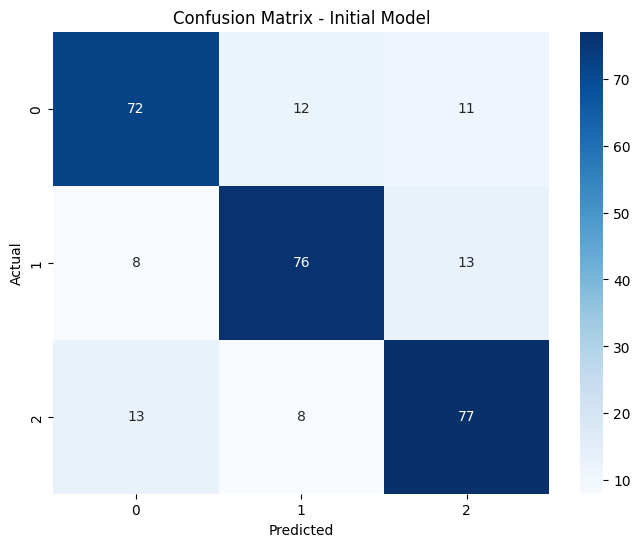

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Prediction and Evaluation (Initial Model)
# Ensure feature names are consistent between training and test datasets
dtest_classification = xgb.DMatrix(data=X_test_classification, label=y_test_classification, feature_names=dtrain_classification.feature_names)

# Prediction and Evaluation (Initial Model)
y_pred_initial = initial_model_classification.predict(dtest_classification)
accuracy_initial = accuracy_score(y_test_classification, y_pred_initial)
print(f"Initial Model - Accuracy: {accuracy_initial:.2f}")
print("\nClassification Report (Initial Model):")
print(classification_report(y_test_classification, y_pred_initial))
cm_initial = confusion_matrix(y_test_classification, y_pred_initial)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_initial, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Initial Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Hyperparameter Tuning for the Best Parameters

##### Define Parameter Grid and Initialize Variables

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5]
}

# Initialize XGBClassifier
xgb_model_classification = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='merror',
    random_state=123
)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model_classification,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=123
)

# Fit RandomizedSearchCV
random_search.fit(X_train_classification, y_train_classification)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='merror',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_const...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=123, scoring='accuracy', verbose=1)

##### The Best Parameters

In [46]:
# Print the best parameters found during hyperparameter tuning for classification
print("\nBest Parameters for Classification:")
print(random_search.best_params_)


Best Parameters for Classification:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


#### Train Final Model with Best Parameters with Early Stopping

In [50]:
# Fit Model with Early Stopping
early_stopping_model = xgb.train(
    params=best_params,
    dtrain=dtrain_classification,
    num_boost_round=1000,
    evals=[(dtrain_classification, 'train'), (dtest_classification, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)


##### Predictions and Evaluation

Final Model (Early Stopping) - Accuracy: 0.77

Classification Report (Final Model):
              precision    recall  f1-score   support

           0       0.79      0.71      0.74        95
           1       0.73      0.84      0.78        97
           2       0.81      0.78      0.79        98

    accuracy                           0.77       290
   macro avg       0.78      0.77      0.77       290
weighted avg       0.78      0.77      0.77       290



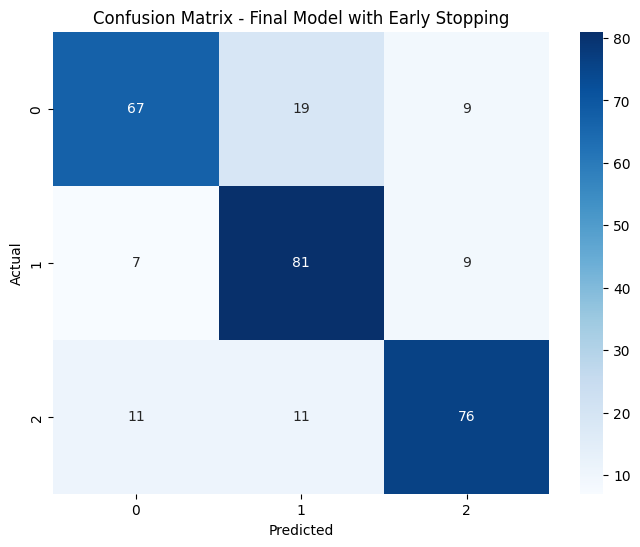

In [51]:
# Prediction and Evaluation (Final Model with Early Stopping)
y_pred_final = early_stopping_model.predict(dtest_classification)
y_pred_final = y_pred_final.astype(int)  # Ensure predictions are integers
accuracy_final = accuracy_score(y_test_classification, y_pred_final)
print(f"Final Model (Early Stopping) - Accuracy: {accuracy_final:.2f}")
print("\nClassification Report (Final Model):")
print(classification_report(y_test_classification, y_pred_final))
cm_final = confusion_matrix(y_test_classification, y_pred_final)
plt.figure(figsize=(8, 6))S
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Model with Early Stopping')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Feature Importance



<Figure size 1000x600 with 0 Axes>

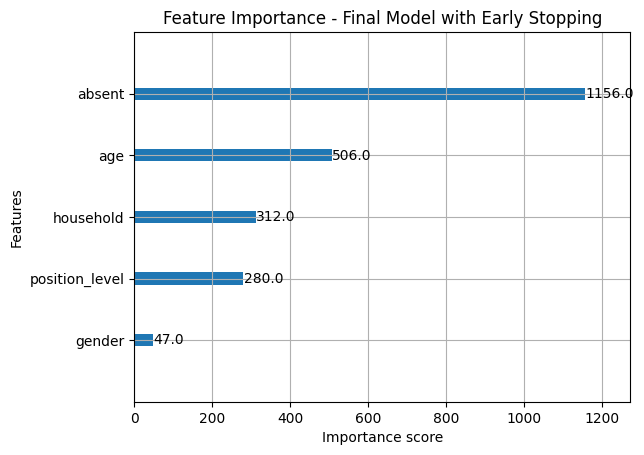

In [53]:
# Variable Importance (Final Model)
plt.figure(figsize=(10, 6))
xgb.plot_importance(early_stopping_model, max_num_features=10)
plt.title("Feature Importance - Final Model with Early Stopping")
plt.show()

## Summary and Conclusion

This notebook provided a comprehensive overview of Extreme Gradient Boosting (XGBoost), a powerful and widely-used machine learning algorithm. We began by explaining the core concepts of XGBoost, including its objective function, additive training, second-order approximation, and tree structure optimization. Key features, advantages, and limitations of XGBoost were discussed, along with a comparison to other tree-based ensemble methods like GBM, LightGBM, and Random Forest.

A simplified implementation of XGBoost from scratch was demonstrated, illustrating the fundamental steps involved in building and training an XGBoost model for both regression and classification tasks. This hands-on approach helped in understanding the internal workings of the algorithm.

Subsequently, we delved into using the official XGBoost Python package, highlighting its key functions and demonstrating its application to real-world datasets. For regression, we used the Boston Housing dataset to showcase data preparation, initial model fitting, hyperparameter tuning using GridSearchCV, evaluating the final model, visualizing observed vs. predicted values, and analyzing feature importance. Early stopping was also implemented as a technique to prevent overfitting.

For classification, we utilized a health insurance dataset to predict product types. Similar steps were followed, including data preparation, initial model fitting, hyperparameter tuning, evaluating the final model using accuracy and confusion matrix, and visualizing feature importance for the classification task.

In conclusion, XGBoost is a highly effective and versatile algorithm for both regression and classification problems. Its optimized implementation, regularization techniques, and flexibility make it a go-to choice for many machine learning tasks. While it requires careful hyperparameter tuning and can be computationally intensive for extremely large datasets, its performance and feature importance capabilities make it a valuable tool in the data scientist's arsenal. The practical examples in this notebook demonstrated how to effectively apply XGBoost using its Python package, including crucial steps like hyperparameter tuning and model evaluation.


## References

1.  Chen, T., & Guestrin, C. (2016). *XGBoost: A Scalable Tree Boosting System*. In *KDD '16* (pp. 785–794). arXiv:1603.02754.

2.  Kuhn, M., & Johnson, K. (2019). *Applied Predictive Modeling*. Springer. ISBN: 978-1461468486.

3.  Zhang, Y., & Haghani, A. (2015). *A gradient boosting method to improve travel time prediction*. *Transportation Research Part C*, 58, 308–324. DOI: 10.1016/j.trc.2015.02.019.

Here are some useful online resources for XGBoost in Python:

*   **XGBoost Official Python Documentation:** [https://xgboost.readthedocs.io/en/stable/python/python_api.html](https://xgboost.readthedocs.io/en/stable/python/python_api.html)
*   **XGBoost GitHub Repository:** [https://github.com/dmlc/xgboost](https://github.com/dmlc/xgboost)
*   **Kaggle Learn - Intro to Gradient Boosting:** [https://www.kaggle.com/learn/intro-to-gradient-boosting](https://www.kaggle.com/learn/intro-to-gradient-boosting)
